**MSSV:** 19520007   
**Họ tên:** Võ Khánh An   
**Bài tập:** So sánh 2 ảnh


# Kết nối đến Google Drive

In [68]:
from google.colab import drive 
drive.mount('/gdrive')

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


In [69]:
import os
import cv2 as cv
from google.colab.patches import cv2_imshow
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy.spatial import distance

In [70]:
dir_monhoc = "/gdrive/MyDrive/COURSES/CS231.L22.KHCL"
dir_baitap = os.path.join(dir_monhoc, 'SoSanh2Anh')

In [71]:
path_filename = os.path.join(dir_baitap, 'lena.jpg')
img = cv.imread(path_filename, 0)

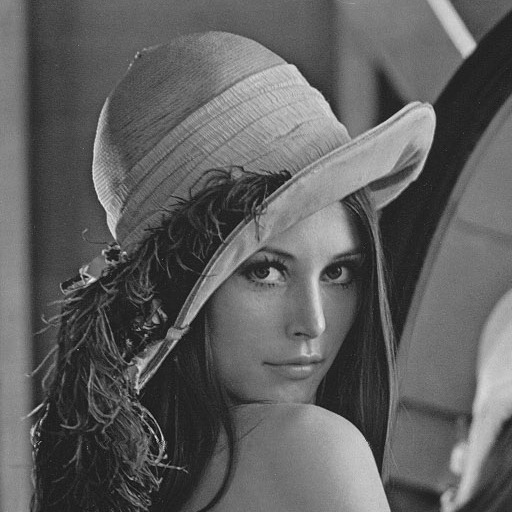

In [72]:
cv2_imshow(img)

# Đo khoảng cách giữa 2 tấm ảnh 

In [73]:
hist = np.histogram(img.flatten(), 256, [0, 256])
hist = cv.calcHist([img], [0], None, [256], [0, 256])


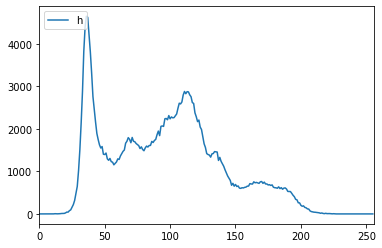

In [74]:
plt.plot(hist)
plt.xlim([0, 256])
plt.legend(('histogram'), loc = 'upper left')
plt.show()

In [75]:
def TinhHist(path_filename):
    img = cv.imread(path_filename, 0)
    hist = cv.calcHist([img], [0], None, [256], [0, 256])
    size = img.shape[0] * img.shape[1]
    hist = hist / size
    return hist

In [76]:
hist1 = TinhHist(path_filename)

In [77]:
path_filename = os.path.join(dir_baitap, 'lena256.jpg')
hist2 = TinhHist(path_filename)

In [78]:
dist = np.linalg.norm(hist1 - hist2)
print (np.linalg.norm(hist1 - hist1))
dist

0.0


0.006519829878930243

# So khớp 1 tấm ảnh với 50 tấm ảnh có trong thư mục

In [79]:
dir_a = os.path.join(dir_monhoc, 'SoSanh2Anh/Holiday50')

In [80]:
images = []
for image_path in os.listdir(dir_a):
    path_filename = os.path.join(dir_a, image_path)
    if path_filename is not None:
        images.append(path_filename)

In [81]:
len(images)

50

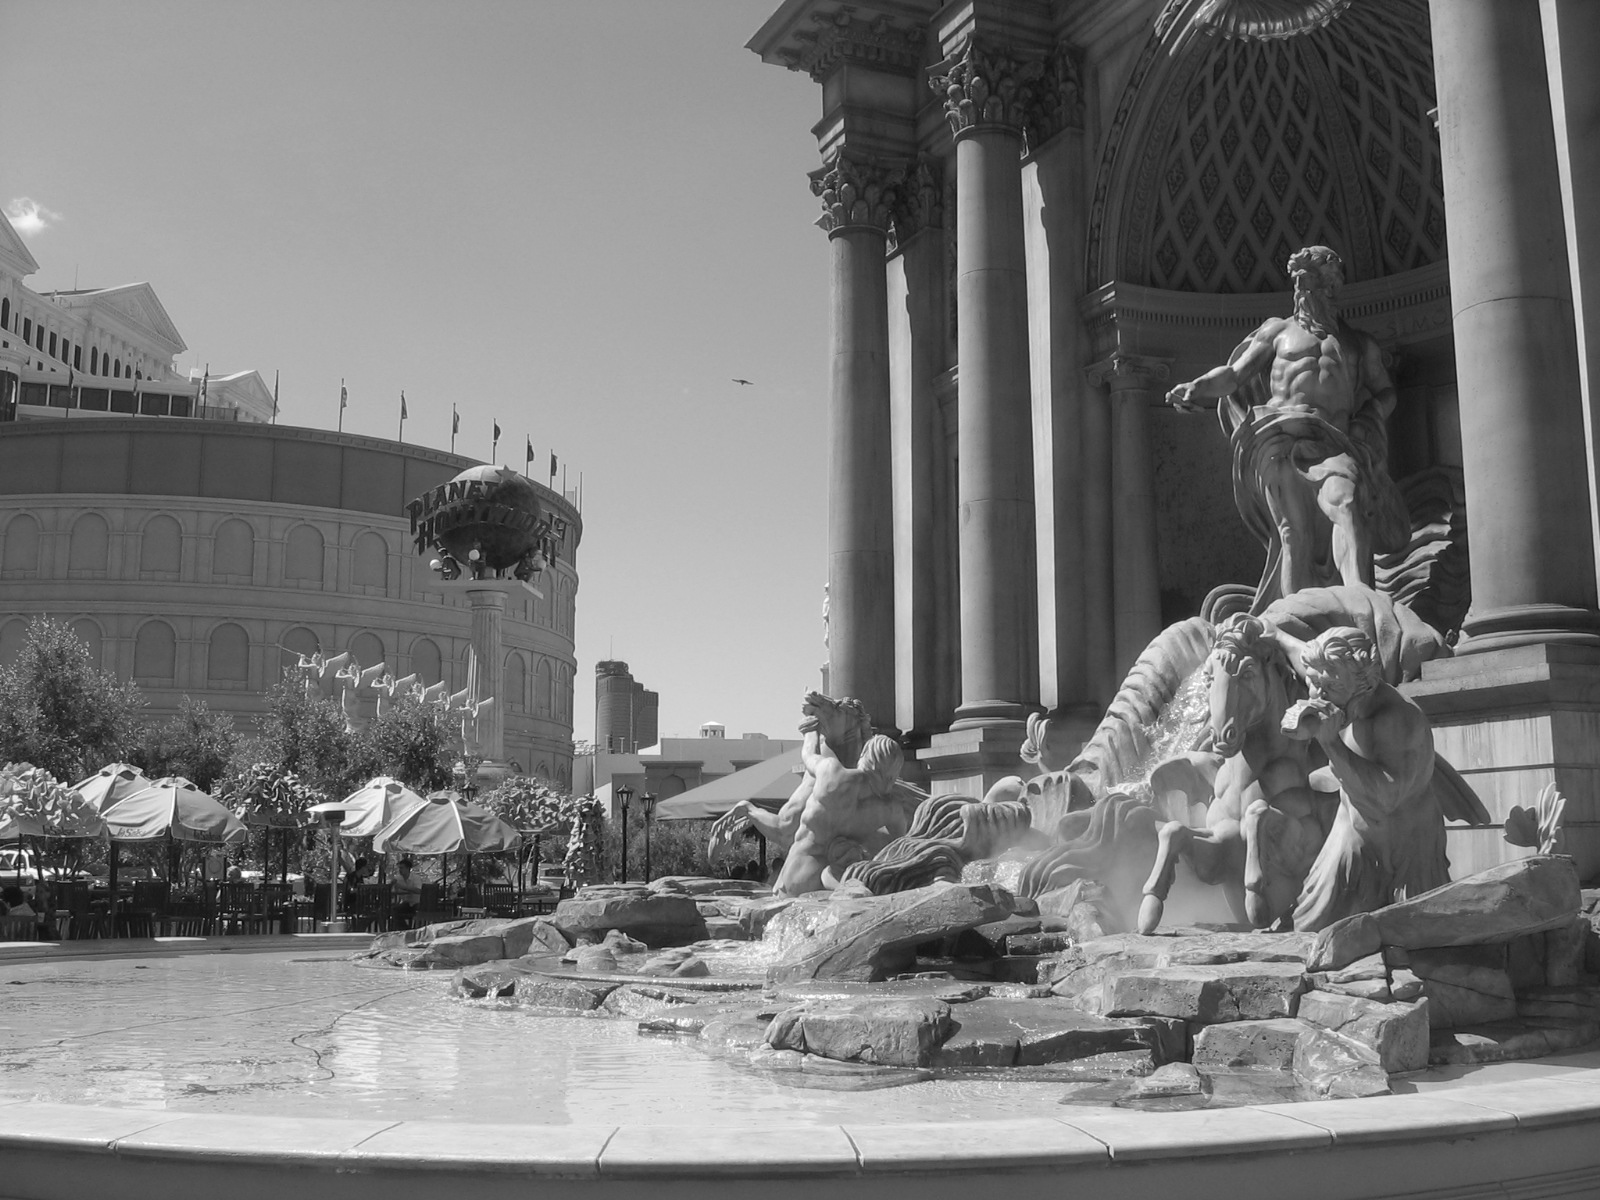

In [82]:
x = images[30]
hist1 = []
hist1.append(np.reshape(TinhHist(x), (256)))
np.shape(hist1)
image = cv.imread(x, 0)
cv2_imshow(image)

In [83]:
hist2 = []
for a in images:
    hist2.append(np.reshape(TinhHist(a), (256)))
np.shape(hist2)

(50, 256)

In [84]:
d = distance.cdist(hist1, hist2, metric='euclidean')
np.reshape(d,(50))

array([0.11571945, 0.1824249 , 0.07395937, 0.06137863, 0.08170627,
       0.07504942, 0.09230215, 0.10809831, 0.11299473, 0.05393117,
       0.03473999, 0.04268628, 0.07984226, 0.06455798, 0.10728367,
       0.04335362, 0.06903804, 0.05084407, 0.03291093, 0.06106746,
       0.03886935, 0.09004515, 0.06562197, 0.03878212, 0.04075447,
       0.16098561, 0.06411558, 0.07819545, 0.0530681 , 0.04921981,
       0.        , 0.11847435, 0.0952868 , 0.04812875, 0.05046698,
       0.06827517, 0.07763775, 0.05177788, 0.04971482, 0.03600898,
       0.04333914, 0.04357827, 0.06434004, 0.0500061 , 0.13578358,
       0.0427635 , 0.13675133, 0.07420083, 0.17145165, 0.07808545])

# Lấy ra 5 tấm ảnh gần giống nhất với tấm ảnh đầu vào

In [85]:
sort_index = np.argsort(d)
print(sort_index)
sort_index = sort_index.flatten()
print(sort_index[0])

[[30 18 10 39 23 20 24 11 45 40 15 41 33 29 38 43 34 17 37 28  9 19  3 26
  42 13 22 35 16  2 47  5 36 49 27 12  4 21  6 32 14  7  8  0 31 44 46 25
  48  1]]
30


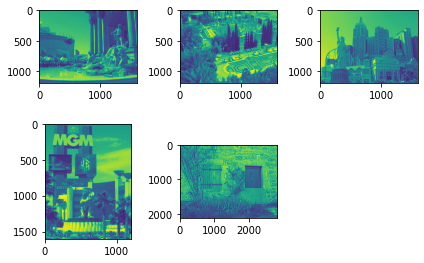

In [93]:
width=50
height=50
rows = 2
cols = 3
axes = []
fig = plt.figure()
for i in range(5):
    image = cv.imread(images[sort_index[i]], 0)
    axes.append(fig.add_subplot(rows, cols, i+1) )
    plt.imshow(image)
fig.tight_layout()    
plt.show()